<a href="https://colab.research.google.com/github/Mujthaba-GM/AIML-NLPProjects/blob/main/NLP-SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#SENTIMENT ANALYSIS
!pip install nltk scikit-learn pandas matplotlib seaborn
#Import Libraries
import nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
#Data set
data = {
    'Review': [
        "I love this product, it is amazing!",
        "Worst experience ever, I hate it.",
        "The movie was fantastic and thrilling.",
        "I am disappointed, waste of money.",
        "Great service and friendly staff.",
        "The food was terrible and tasteless."
    ],
    'Sentiment': ['Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative']
}

df = pd.DataFrame(data)
print(df)


                                   Review Sentiment
0     I love this product, it is amazing!  Positive
1       Worst experience ever, I hate it.  Negative
2  The movie was fantastic and thrilling.  Positive
3      I am disappointed, waste of money.  Negative
4       Great service and friendly staff.  Positive
5    The food was terrible and tasteless.  Negative


In [7]:
#Text Preprocessing
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['Cleaned_Review'] = df['Review'].apply(preprocess)
print(df[['Review', 'Cleaned_Review']])



                                   Review                Cleaned_Review
0     I love this product, it is amazing!          love product amazing
1       Worst experience ever, I hate it.    worst experience ever hate
2  The movie was fantastic and thrilling.     movie fantastic thrilling
3      I am disappointed, waste of money.      disappointed waste money
4       Great service and friendly staff.  great service friendly staff
5    The food was terrible and tasteless.       food terrible tasteless


In [9]:
#Train and split the data
X = df['Cleaned_Review']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [18]:
#Feature Extraction (Bag of Words + TF-IDF)
# Import text vectorization tools
cv = CountVectorizer()        # Converts text documents into a matrix of token counts (Bag of Words)
tfidf = TfidfTransformer()    # Converts token counts into TF-IDF scores (importance of words)

# ----- Training Data -----
X_train_counts = cv.fit_transform(X_train)   # Learn vocabulary from training data and count word occurrences
X_train_tfidf = tfidf.fit_transform(X_train_counts)  # Transform counts into TF-IDF scores for training

# ----- Testing Data -----
X_test_counts = cv.transform(X_test)         # Use the same learned vocabulary to count words in test data
X_test_tfidf = tfidf.transform(X_test_counts)  # Transform test counts into TF-IDF scores


In [19]:
# ----- Model Training -----
model = MultinomialNB()                # Initialize a Naïve Bayes classifier (suitable for text classification)
model.fit(X_train_tfidf, y_train)       # Train the model using TF-IDF features from the training data

# ----- Prediction -----
y_pred = model.predict(X_test_tfidf)    # Predict sentiments for the test dataset using the trained model



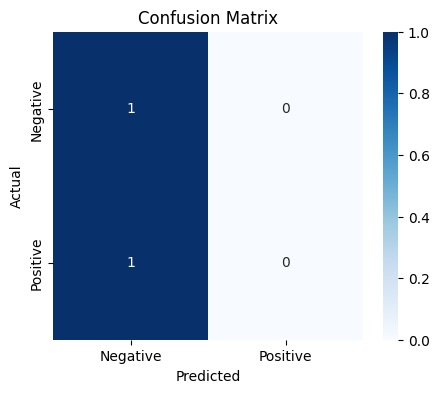

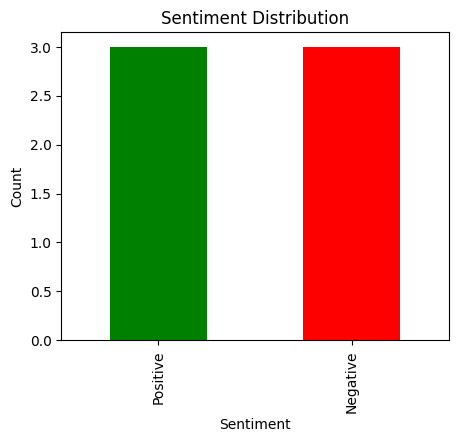

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Sentiment Distribution
plt.figure(figsize=(5,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [20]:
# New test reviews (not part of training set)
new_reviews = [
    "This phone is fantastic and works perfectly.",
    "I am not happy with the service, very bad experience.",
    "The restaurant was amazing, food was delicious.",
    "Terrible product, broke in just one week."
]

# Preprocess the reviews
new_reviews_cleaned = [preprocess(review) for review in new_reviews]

# Convert to TF-IDF features
new_counts = cv.transform(new_reviews_cleaned)
new_tfidf = tfidf.transform(new_counts)

# Predict sentiments
new_predictions = model.predict(new_tfidf)

# Show results
for review, sentiment in zip(new_reviews, new_predictions):
    print(f"Review: {review} → Sentiment: {sentiment}")


Review: This phone is fantastic and works perfectly. → Sentiment: Positive
Review: I am not happy with the service, very bad experience. → Sentiment: Positive
Review: The restaurant was amazing, food was delicious. → Sentiment: Negative
Review: Terrible product, broke in just one week. → Sentiment: Negative


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# ----- Training Data -----
texts = [
    "I love this", "Worst ever", "Fantastic movie", "Waste of money",
    "Great service", "Terrible food",
    "Amazing phone", "Awesome experience", "Good product", "Excellent service"
]
labels = [
    "Positive", "Negative", "Positive", "Negative", "Positive", "Negative",
    "Positive", "Positive", "Positive", "Positive"
]

# ----- Vectorize + Train -----
v = TfidfVectorizer()
X = v.fit_transform(texts)
m = MultinomialNB()
m.fit(X, labels)

# ----- Test Data -----
tests = ["Amazing product", "Very bad service", "Loved the movie"]
preds = m.predict(v.transform(tests))

# ----- Output -----
for t, p in zip(tests, preds):
    print(f"{t} → {p}")

# ----- Accuracy on Training Data -----
train_preds = m.predict(X)
print("Training Accuracy:", accuracy_score(labels, train_preds))


Amazing product → Positive
Very bad service → Positive
Loved the movie → Positive
Training Accuracy: 1.0
